## Logistic Regression with multiple variables

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys()) # Identify the keys present in the dataset

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
feature_names = iris["feature_names"] # Identify the features present in the dataset

In [ ]:
feature_names

In [4]:
X = iris["data"][:,(2,3)]## Select only two features i.e. 2nd and 3rd column to perform logistic regression using two variables

In [7]:
target_names = iris["target_names"]# Explore classes which are labelled 

In [8]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X.shape  # Confirm shape of input variable X


(150, 2)

In [10]:
y = (iris["target"] == 2).astype(np.int) # Convert labels for binary classification 

In [11]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Train the model

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Generate test data

In [13]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]




In [14]:
# Predict on test data
y_proba = log_reg.predict_proba(X_new)
y_proba.shape

(100000, 2)

In [15]:
# The Basics of NumPy Arrays

In [16]:
y_proba

array([[9.99999998e-01, 1.65140362e-09],
       [9.99999998e-01, 1.73133642e-09],
       [9.99999998e-01, 1.81513821e-09],
       ...,
       [9.14530673e-11, 1.00000000e+00],
       [8.72308892e-11, 1.00000000e+00],
       [8.32036662e-11, 1.00000000e+00]])

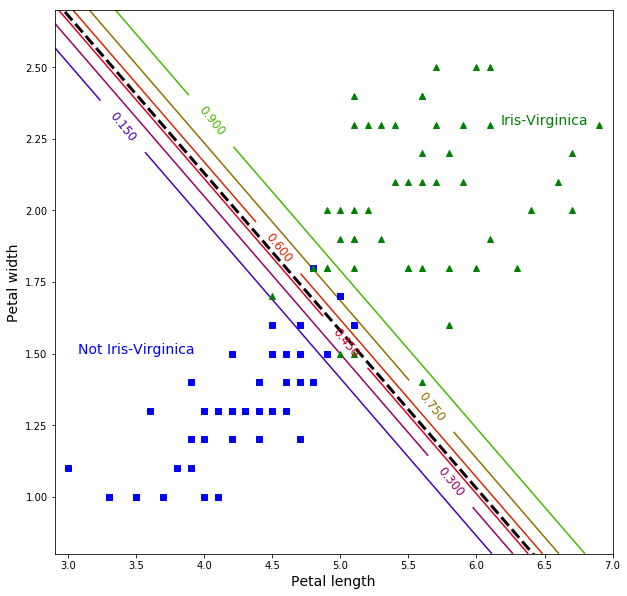

In [17]:
# Visualisation of the test data
plt.figure(figsize=(10, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()